# Matplotlib introduction

You've already seen this one on lecture 3, but today we'll look a little more in depth of its practical use

In [6]:
%pip install pandas openpyxl matplotlib -q

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
data_code = pd.read_csv("./data/CodeAndCoffeeModified.csv")
data_code.head()

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,18 to 29
3,10,3,While coding,Sometimes,Turkish,No,Male,18 to 29
4,8,2,While coding,Sometimes,Nescafe,Yes,Male,30 to 39


In [3]:
data_sales = pd.read_excel("./data/Coffee Shop Sales.xlsx")
data_sales.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


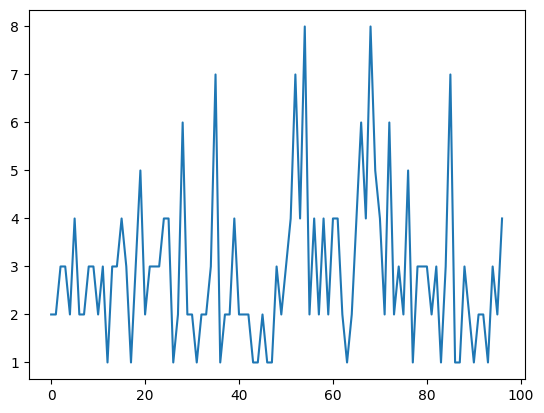

In [4]:
fig, ax = plt.subplots()
ax.plot(data_code["CoffeeCupsPerDay"])

### Plots are best used to show variation over time

But for other kinds of variations we can use **scatter** graphs

Text(0, 0.5, 'Coffee Type')

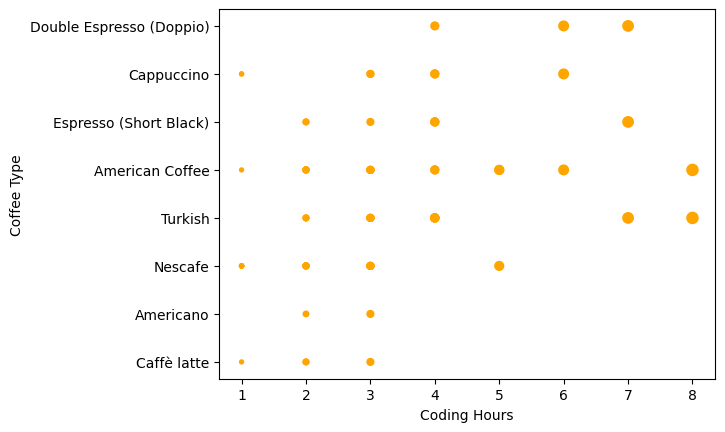

In [28]:
fig, ax = plt.subplots()

ax.scatter(             # Shows data of TWO axes as scattered dots
    data_code["CoffeeCupsPerDay"],            # x axis
    data_code["CoffeeType"],                  # y axis
    s=(data_code["CoffeeCupsPerDay"]*8),      # Size of dots
    c="orange"                                # Color. Can also be used to show variation
)

ax.set_xlabel("Coding Hours")
ax.set_ylabel("Coffee Type")

I'd assume Americano and Caffe latte drinkers don't code taht much and drink as much as hard-working American and Turkish coffee people

/tmp/ipykernel_15909/4044265140.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


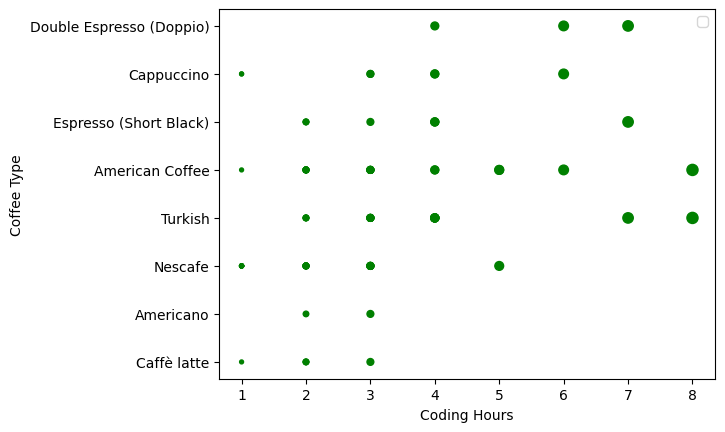

In [22]:
fig, ax = plt.subplots()

for dc in [data_code[""]
ax.scatter(             # Shows data of TWO axes as scattered dots
    data_code["CoffeeCupsPerDay"],            # x axis
    data_code["CoffeeType"],                  # y axis
    s=(data_code["CoffeeCupsPerDay"]*8),      # Size of dots
    alpha=0.3
)

ax.set_xlabel("Coding Hours")
ax.set_ylabel("Coffee Type")
ax.legend()

#### You can also create plots implicitly without calling ax

This is simpler but takes away a lot of customization

In [71]:
data_sales = pd.read_csv("./data/coffee_prices/coffee-prices-historical-data.csv")

data_sales = data_sales[:12000]

In [72]:
data_sales["date"] = pd.to_datetime(data_sales["date"], format="ISO8601")

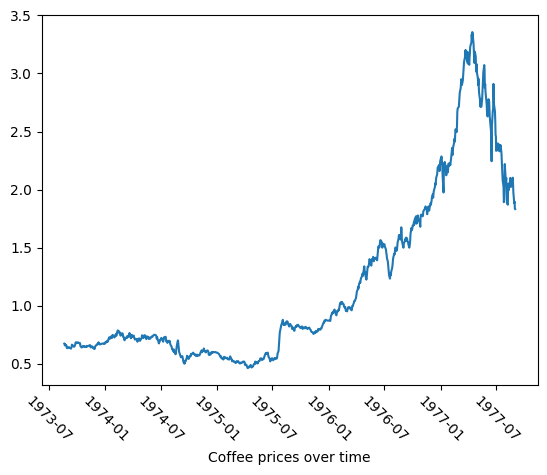

In [81]:
plt.plot(data_sales["date"][:1000], data_sales[" value"][:1000])
plt.xlabel("Coffee prices over time")
plt.tick_params(axis='x', labelrotation=-45)

#### Equivalent to this, but with less context

Matplotlib recommends that you use the latter explicit method, but in the context of Jupyter notebook cells it is okay to use the `plot` unless you need extra customization

Text(0, 0.5, 'Coffee Price')

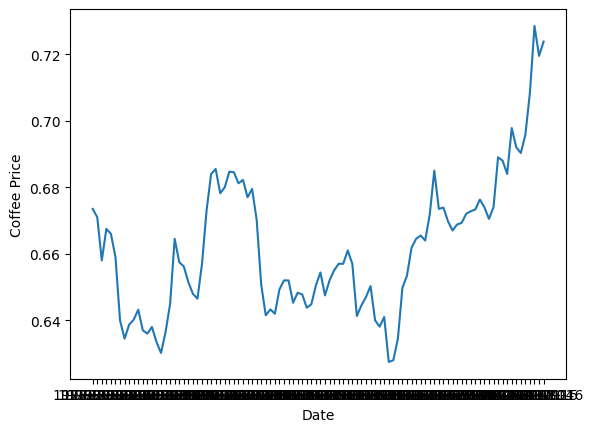

In [50]:
fig, ax = plt.subplots()

ax.plot(
    data_sales["date"][:100],
    data_sales[" value"][:100],
)

ax.set_xlabel("Date")
ax.set_ylabel("Coffee Price")